In [ ]:
!pip install tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [23]:
 #Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
import matplotlib.pyplot as plt
import numpy as np

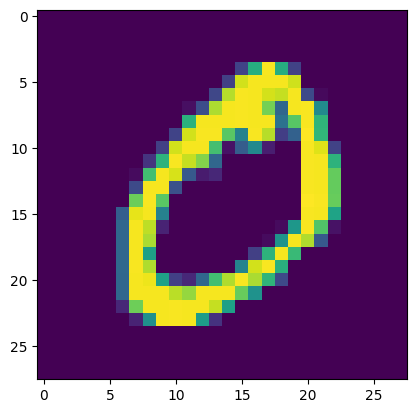

In [25]:
data=train_images[1]
plt.imshow(data)
plt.show()

In [26]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
# Build the neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3332 - accuracy: 0.9073 - val_loss: 0.1827 - val_accuracy: 0.9512
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1537 - accuracy: 0.9561 - val_loss: 0.1296 - val_accuracy: 0.9628
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1062 - accuracy: 0.9700 - val_loss: 0.1213 - val_accuracy: 0.9654
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0816 - accuracy: 0.9761 - val_loss: 0.1007 - val_accuracy: 0.9697
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 0.0908 - val_accuracy: 0.9727


In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9750
Test accuracy: 0.9750000238418579
Test loss: 0.08318492025136948


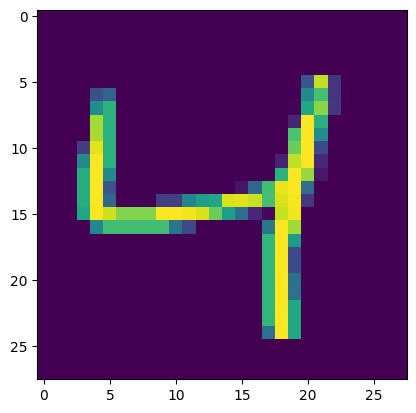

In [32]:
#Test by giving input image

input_img=train_images[2]
plt.imshow(input_img)
plt.show()

In [36]:
input_img = input_img.reshape((1, 28, 28, 1))
predicted_probs = model.predict(input_img)
predicted_probs

1/1 [==============================] - 0s 18ms/step


array([[5.4358031e-07, 1.0149972e-05, 1.7211538e-04, 2.2392398e-04,
        9.9888915e-01, 1.4295187e-05, 3.7841197e-05, 3.0276238e-04,
        3.2646203e-05, 3.1661120e-04]], dtype=float32)

In [38]:
predicted_label = np.argmax(predicted_probs)
predicted_label

4